In [31]:
from IPython.display import display, HTML, Markdown
display(HTML("<style>.container { width:98% !important; }</style>"))

import pandas as pd
pd.set_option("display.max_columns",999)
pd.options.display.max_rows = 9999
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [167]:
import numpy as np

In [174]:
df_emails = pd.read_csv('/Users/jinyaotian/Desktop/Data-Science-Take-Home-Project-main/data/email_data.csv',delimiter=',')
display(df_emails.head())

df_activity = pd.read_csv('/Users/jinyaotian/Desktop/Data-Science-Take-Home-Project-main/data/activity_data.csv',delimiter=',')
display(df_activity.head())

,LogId,EmailSentDateTimeUtc,EmailCampaignId,EmailOpenedDateTimeUtc,EmailClickedDateTimeUtc,UserId,ZipCode,AddressData
0,208728980120,2019-07-31 15:13:25.817,792229022220,NaN,NaN,851332105693,nan,NaN
1,292563123584,2019-08-02 02:15:52.447,866429603262,2019-08-02 15:16:01.7533333,NaN,369293054977,nan,NaN
2,72552047640,2019-08-07 16:21:37.293,383130475294,NaN,NaN,938684493058,nan,NaN
3,1089121462891,2019-08-07 16:38:03.323,792229022220,NaN,NaN,50233193142,nan,NaN
4,828770719378,2019-08-12 11:45:43.293,479810600058,NaN,NaN,369293054977,nan,NaN


,UserId,DateOfActivityPST,ActivityCount
0,241710509395,2019-09-24,29
1,241710509395,2020-09-11,60
2,435228414681,2018-01-06,12
3,435228414681,2018-04-20,20
4,435228414681,2018-05-10,136


### Question 1. How many rows are in the two datasets? If the log of emails represents 3% of the emails we sent over this period, how many emails did we send? 

In [175]:
print("Answer: there are %d rows in df_emails dataset and %d rows in df_activity dataset."%(df_emails.shape[0],df_activity.shape[0]))

Answer: there are 474163 rows in df_emails dataset and 4559973 rows in df_activity dataset.


In [176]:
print('Total number of emails have been sent over this period is %d.'%(df_emails.shape[0]/0.03))

Total number of emails have been sent over this period is 15805433.


### Question 2: What are the earliest and most recent dates of emails sent in this dataset in California time (Pacific Standard Time Zone)? (use python to print the date in format mm/dd/yyy hour:minute in 24 hour time)

In [22]:
from datetime import datetime

In [35]:
df_emails.columns

Index(['LogId', 'EmailSentDateTimeUtc', 'EmailCampaignId',
       'EmailOpenedDateTimeUtc', 'EmailClickedDateTimeUtc', 'UserId',
       'ZipCode', 'AddressData'],
      dtype='object')

In [36]:
df_emails.dtypes

LogId                        int64
EmailSentDateTimeUtc        object
EmailCampaignId              int64
EmailOpenedDateTimeUtc      object
EmailClickedDateTimeUtc     object
UserId                       int64
ZipCode                    float64
AddressData                 object
dtype: object

In [182]:
#Convert time zone from Universal time into US Pacific time
df_emails['EmailSentDateTimeUtc'] = pd.DatetimeIndex(df_emails['EmailSentDateTimeUtc'],tz = 'utc').tz_convert('US/Pacific')

In [183]:
# Note that the date and time are in coordinated universal time. 
# Coordinated Universal Time is 7 hours ahead of Pacific Standard Time
t_1 = df_emails['EmailSentDateTimeUtc'].min()
print('The earliest date of emails sent in this dataset in California time (Pacific Standard Time Zone) is %d/%d/%d %d:%d' %(t_1.month,t_1.day,t_1.year,t_1.hour,t_1.minute))

The earliest date of emails sent in this dataset in California time (Pacific Standard Time Zone) is 1/3/2018 20:29


In [184]:
t_2 = df_emails['EmailSentDateTimeUtc'].max()
print('The most recent date of emails sent in this dataset in California time (Pacific Standard Time Zone) is %d/%d/%d %d:%d' %(t_2.month,t_2.day,t_2.year,t_2.hour,t_2.minute))

The most recent date of emails sent in this dataset in California time (Pacific Standard Time Zone) is 4/19/2021 6:45


### Question 3: Which 10 zip codes receive the most emails and how many emails do they receive?

In [185]:
df_group1 = df_emails.groupby(['ZipCode']).count()['UserId'].sort_values(ascending = False)

In [186]:
index = df_group1.index[:10]

In [187]:
# Top 10 zip codes for the most emails received
df_group1.loc[index]

ZipCode
63301.000    312
33801.000    310
34210.000    299
38301.000    295
67460.000    285
95971.000    277
42301.000    266
36104.000    254
40769.000    234
85225.000    229
Name: UserId, dtype: int64

### Question 4: Plot two lines on a single graph. 
#### 1) total distinct users who were sent at least 1 email by month and year.
#### 2) the monthly percentage of users who were sent an email and were active the same day

In [188]:
# create a new column with month of date field 'EmailSentDateTimeUtc'
df_emails['month'] = pd.DatetimeIndex(df_emails['EmailSentDateTimeUtc']).month

# create a new column with Year of date field 'EmailSentDateTimeUtc'
df_emails['year'] = pd.DatetimeIndex(df_emails['EmailSentDateTimeUtc']).year


In [225]:
#Count the total distinct users who were sent at least 1 email by month and year.
grouped = df_emails.groupby(['year','month']).agg({'UserId':['nunique']})

In [228]:
# 1) 
# list_1 to store total distint users who were sent at least 1 by month and by year
list_1 = []
year = [2018,2019,2020,2021]
for y in year:
    if y != 2021: 
        for i in range(1,13):
            list_1.append(grouped.loc[(y,i)][0])
    else: 
        for i in range(1,5):
            list_1.append(grouped.loc[(y,i)][0])

In [205]:
# 2)
#Convert timestamp back to string, in the form 'xxxx/xx/xx'.
df_emails['EmailSentDateTimeUtc'] = df_emails['EmailSentDateTimeUtc'].dt.strftime('%Y-%m-%d')

In [206]:
# left join two data frame
df_merge = df_emails.merge(df_activity[['UserId','DateOfActivityPST']],on = 'UserId', how = 'left')

In [208]:
df_merge['Same day'] = np.zeros(len(df_merge))
for i in range(len(df_merge)):
    if df_merge.loc[i,'EmailSentDateTimeUtc'] == df_merge.loc[i,'DateOfActivityPST']:
        df_merge.loc[i,'Same day'] = 1
    else:
        continue

In [229]:
#Extract those rows where users who were sent an email and were active the same day
df_sameday = df_merge.loc[df_merge['Same day'] == 1]

grouped_2 = df_sameday.groupby(['year','month']).agg({'UserId':['nunique']})
list_2 = []
year = [2018,2019,2020,2021]
for y in year:
    if y != 2021: 
        for i in range(1,13):
            list_2.append(grouped_2.loc[(y,i)][0])
    else: 
        for i in range(1,5):
            list_2.append(grouped_2.loc[(y,i)][0])

In [234]:
#list_perc : the monthly percentage of users who were sent an email and were active the same day 
list_perc = []
for i in range(len(list_1)):
    list_perc.append(100*list_2[i]/list_1[i])

In [236]:
import matplotlib.pyplot as plt

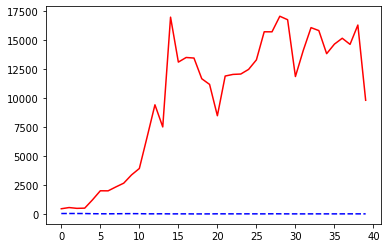

In [238]:
# Plot two lines on a single graph
plt.plot(list_1,'r-')
plt.plot(list_perc,'b--')
plt.show()

It seems that it is meaningless to draw the two lines on a single praph, because their values differ too large.